In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from astropy import constants as const

In [2]:
c = const.c.value
alpha = 10**(-15)

laser = 'Nd:YAG'
#starname     = 'KWHya'

if (laser == 'Nd:YAG'):
    #Active medium
    Ntot = 10**23         
    sigma = 2.8*10**(-23)
    A = 1/(230*10**(-6))
    
    #Resonator
    R = 0.80
    L = 1 #Length
    tau = (2*L)/(c*(1-R))
    
    #Laser parameters
    Ith = 1/(c*sigma*tau)
    Wth = (Ith*A)/(Ntot-Ith)
    Wp = 500*Wth
    
    #Colour parameters
    colour0 = 'pink'
    colour1 = 'limegreen'

In [3]:
def RE2(t, y):
    global tau, Qsw
    
    I = y[0]
    p = y[1]
    
    if t > 1e-5/2 and Qsw == True:
        tau = (2*L)/(c*(1-0.95))
        Qsw = False
    
    dIdt = Wp*(Ntot-I) - sigma*c*p*I-A*I
    dpdt = p*(sigma*c*I-1/tau)+alpha*A*I
    
    return dIdt, dpdt

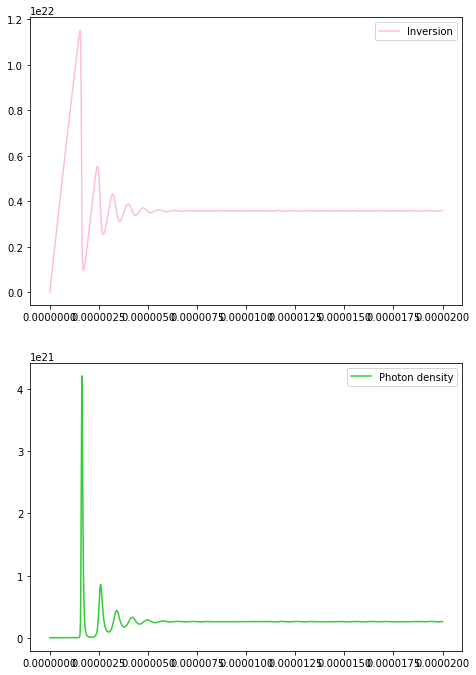

In [4]:
RE = RE2
#RE = RE4

Qsw = False

#Solve_ivp solves the problem:
if (RE == RE2):
    y0 = [0, 1]

tf = 2*10**(-5)

#Time settting output:
time_step = 0.1
time_interval = np.linspace(0,tf,10000)
t = time_interval

time_init = 0
time_end = tf

mysol = solve_ivp(RE, (time_init, time_end), y0=y0, t_eval=time_interval)
 
#Output is collected:
fig = plt.figure()
fig.subplots_adjust(top = 0.8)

ax1 = fig.add_axes([0.15,1,1,1])
line1 = ax1.plot(mysol.t,mysol.y[0],label='Inversion', color = colour0)

ax2 = fig.add_axes([0.15,-0.2,1,1])
line2 = ax2.plot(mysol.t,mysol.y[1],label='Photon density', color = colour1)

ax1.legend()
ax2.legend()
plt.show()

In [5]:
#Ved Q-switching ændre man på sin losses efter et stykke tid